<a href="https://colab.research.google.com/github/marjansherafati/Training-Material-for-Neural-Network/blob/master/Neural_Network_for_classifying_Iris_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Neural Network to classify Iris flowers

in this notebook, we will use the Python **scikit learn** library to build a neural network on the Iris dataset.


Scikit Learn (sklearn) is an open source python library for machine learning and provides many supervised and unsupervised training algorithms


# Loading and Visualizing the Data
The first step is to import this dataset into our program. We will do so using python's **Pandas** library

In [0]:
import pandas as pd

# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)


let's see what the dataset looks like


In [2]:
irisdata.head()


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


A useful python library for visualization is **seaborn**. The following code section provides an excellent visualization of the multidimensional relationships among the samples.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


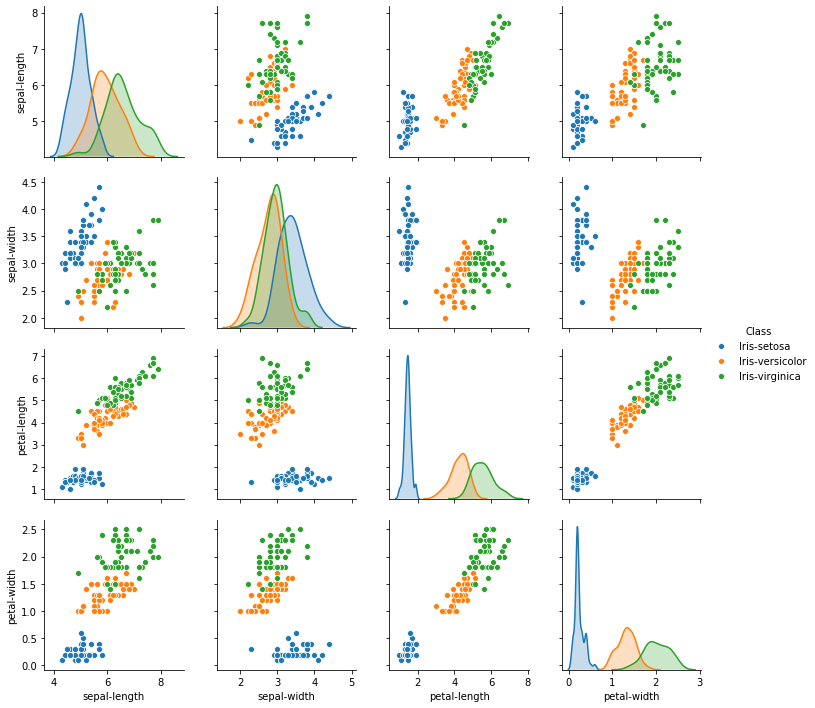

In [20]:
import seaborn as sns

sns.pairplot(irisdata, hue='Class', size=2.5);


# Data pre-processing

The first task in any machine learning exercise is to make sure that the input data is in the shape, type, and format that we want it to be. This step can include cleaning up the dataset (if the dataset is messy), slicing the data into features and labels, and normalizing each feature input.

You can see that our dataset has five columns. The task is to predict the class (which are the values in the fifth column) that the iris plant belongs to, which is based upon the sepal-length, sepal-width, petal-length and petal-width (the first four columns). The next step is to split our dataset into attributes and labels. Execute the following script to do so:

In [3]:
# Assign data from first four columns to X variable
X = irisdata.iloc[:, 0:4]

# Assign data from first fifth columns to y variable
y = irisdata.select_dtypes(include=[object])

y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


You can see that the values in the y series are categorical. However, neural networks work better with numerical data. Our next task is to convert these categorical values to numerical values. But first let's see how many unique values we have in our y series. Execute the following script:

In [4]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We have three unique classes 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'. Let's convert these categorical values to numerical values. To do so we will use Scikit-Learn's LabelEncoder class.

Execute the following script:

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

#let's see how y changed
y.Class.unique()

array([0, 1, 2])

**Train Test Split**

To avoid over-fitting, we will divide our dataset into training and test splits. The training data will be used to train the neural network and the test data will be used to **evaluate the performance** of the neural network. This helps with the problem of over-fitting because we're evaluating our neural network on data that it has not seen (i.e. been trained on) before.

sklearn gives has a train_test_split tool that we will use below

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

**Feature Scaling**

Before making actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

sklearn's StandardScaler can be used for this task

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

And now it's finally time to train a neural network!

we will use the **Multi Layer Perceptron (MLP)** architecture for our classification task.

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Let's go through the three lines of code above:

The first step is to import the MLPClassifier class from the sklearn.neural_network library. In the second line, this class is initialized with two parameters.

The first parameter, hidden_layer_sizes, is used to set the size of the hidden layers. In our script we will create three layers of 10 nodes each. There is no standard formula for choosing the number of layers and nodes for a neural network and it varies quite a bit depending on the problem at hand. The best way is to try different combinations and see what works best.

The second parameter to MLPClassifier specifies the number of iterations, or the epochs, that you want your neural network to execute. Remember, one epoch is a combination of one cycle of feed-forward and back propagation phase.

By default the 'relu' activation function is used with 'adam' cost optimizer. However, you can change these functions using the activation and solver parameters, respectively.

In the third line the fit function is used to train the algorithm on our training data i.e. X_train and y_train.
 
  



# Evaluating the Algorithm
We created our algorithm and we made some predictions on the test dataset. Now is the time to evaluate how well our algorithm performs. To evaluate an algorithm, the most commonly used metrics are a confusion matrix, precision, recall, and f1 score. The confusion_matrix and classification_report methods of the sklearn.metrics library can help us find these scores. The following script generates evaluation report for our algorithm:

In [0]:
predictions = mlp.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



You can see from the confusion matrix that our neural network only misclassified one plants out of the 30 plants we tested the network on. Also, the f1 score of 0.97 is very good, given the fact that we only had 150 instances to train.

Your results can be slightly different from these because train_test_split randomly splits data into training and test sets, so our networks may not have been trained/tested on the same data. But overall, the accuracy should be greater than 90% on your datasets as well.

**Using the neural network for classification**

We can now use the neural network we built to classify a new data point. The data point is a 1*4 vector, and represents the features belonging to a flower. The output of the neural network is a label assignment for that flower (setosa, versicolor or virginica)



In [16]:
example = [[5.3,3.4,1.6,0.2]]
example = scaler.transform(example)
y_predict = mlp.predict(example)

if y_predict == 0:
  label = 'setosa'
elif y_predict == 1:
  label = 'versicolor'
else:
  label = 'virginica'


print('The input flower is labeled as ',label)

The input flower is labeled as  setosa
